# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# Vypracování domácího úkolu

## Základní info o dataframech

Začnu tím, že si naimportuji potřebné knihovny, načtu si data do dataframu a o každém si zjistím základnín informace, např.: chybějící hodnoty, datatypy, počet unikátních hodnot.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [3]:
df_in = pd.read_csv('intakes.csv')
df_out = pd.read_csv('outcomes.csv')

In [4]:
df_in.head(10)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
6,A635072,Beowulf,04/16/2019 09:53:00 AM,April 2019,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Great Dane Mix,Black
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby
8,A708452,Mumble,07/30/2015 02:37:00 PM,July 2015,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby


In [5]:
df_in.info()
df_in.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

Z výpisu je vidět, že dataframe **intakes.cvs** diponuje signifikantním počtem řádků. Drtivá většina sloupců je vyplněná, až nasloupec **Name**, ve kterém chybí zhruba 30% údajů, a sloupec **Sex upon Intake**, ve kterém chybí jedan položka. 

Z výpisu o unikátních hodnotách je znepokojivý první slupec **Animal ID**, ve kterém bych očekávala stejný počet unikátních hodnot, jako řádků, avšak zhruba 5% ID se shoduje s jinými. Zaujal mě i sloupec **sex**, ve kterém bych očekávala dvě unikátní hodnoty místo pěti, ale z výpisu `head()` vidím, že pohlaví je jěště rozlišováno na kastrované a nekastrované jedince, případně neznámé.

In [6]:
df_out.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [7]:
df_out.info()
df_out.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

Z výpisu o dataframu `outcomes.csv` vidím podobné honoty jako i `intakes.cvs`. Opět chybí zhruba 30% jmen, stejný problém se sloupcem **Animal ID**, i pohlavích je opět 5. 

Avšak tento dataframe má další sloupce s chybějícími hodnotami. Sloupce **Outcome Type**, **Sex upon Outcome**, **Age upon Outcome** mají chybějící hodnoty v řádu desítek, či jednotek, což by neměl být pro analýzu dat problém. Nicméně sloupec **Outcome Subtype** není vyplněn ani z 50%, což už může později dělat problémy a tak je dobré na to nezapomenout.

## Příprava dat

### Převod sloupců na vhodný datatype

#### Převod slupce Age upon Intake/Outcome

Sloupec s věkem převedu na jedno číslo. V případě, že je u zvířete uvedeno stáří v měsících, nebo týdnech, číslo vydělím a zaokrouhlím na dvě desetinná místa. Pokud je věk uveden ve dnech píši automatomaticky 0. Funkci aplikuji i na sloupec v tabulce `Outcomes.csv` pro případ, že by se mi to hodilo u některé z otázek.

In [8]:
def extract_age(ser):
    if type(ser) != float:
        age = ser
        if "month" in age:
            num = re.findall(r'[0-9]+', age)
            months = int(num[0])
            ser = round(months/12, 2)
        elif "week" in age:
            num = re.findall(r'[0-9]+', age)
            weeks = int(num[0])
            ser = round((weeks/4)/12, 2)
        elif "day" in age:
            ser = 0
        else:
            num = re.findall(r'[0-9]+', age)
            ser = int(num[0])
    return ser

In [9]:
df_in["Age upon Intake"] = df_in["Age upon Intake"].apply(extract_age)
df_out["Age upon Outcome"] = df_out["Age upon Outcome"].apply(extract_age)

In [10]:
df_out["Age upon Outcome"] = df_out["Age upon Outcome"].astype("float64")
df_in["Age upon Intake"] = df_in["Age upon Intake"].astype("float64")

#### Přetypování sloupce DateTime

Přetypování času provedu přes pandas funkci to_datetime, která defoultně nastaví datatype *datetime64[ns]*

In [11]:
import datetime
df_in["DateTime"]  = pd.to_datetime(df_in["DateTime"],  format = '%m/%d/%Y %I:%M:%S %p')
df_out["DateTime"]  = pd.to_datetime(df_out["DateTime"],  format = '%m/%d/%Y %I:%M:%S %p')

#### Přetypování sloupce MonthYear a Date of Birth

In [12]:
import datetime

df_in["MonthYear"] = pd.to_datetime(df_in["MonthYear"],  format = '%B %Y')
df_out["MonthYear"] = pd.to_datetime(df_out["MonthYear"],  format = '%b %Y')
df_out["Date of Birth"] = pd.to_datetime(df_out["Date of Birth"],  format = '%m/%d/%Y')

In [13]:
df_out.nunique()

Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        43
Breed                 2749
Color                  619
dtype: int64

#### Vypořádání se s chybějícími hodnotami

V případě sloupců s chybějícími údaji maximálně na 100 řádcích, rozhodla jsem se tyto řádky z dataframů odstranit. Oba Dataframy mají počet řádků v řádu sta tisíů a tak by v následné analýze nemělo vadit o 100 řádků méně. 

Ve sloupcích, kde chybějících hodnot přeshuje 100, nahradím hodnoty NaN -1.

In [14]:
df_in = df_in.dropna(subset=["Sex upon Intake"])
df_out = df_out.dropna(subset=["Outcome Type"])
df_out = df_out.dropna(subset=["Sex upon Outcome"])
df_out = df_out.dropna(subset=["Age upon Outcome"])
df_out = df_out.dropna(subset=["Outcome Type"])

df_in["Name"] = df_in["Name"].fillna(-1)
df_out["Name"] = df_out["Name"].fillna(-1)
df_out["Outcome Subtype"] = df_out["Outcome Subtype"].fillna(-1)

In [15]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138740 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138740 non-null  object        
 1   Name              138740 non-null  object        
 2   DateTime          138740 non-null  datetime64[ns]
 3   MonthYear         138740 non-null  datetime64[ns]
 4   Date of Birth     138740 non-null  datetime64[ns]
 5   Outcome Type      138740 non-null  object        
 6   Outcome Subtype   138740 non-null  object        
 7   Animal Type       138740 non-null  object        
 8   Sex upon Outcome  138740 non-null  object        
 9   Age upon Outcome  138740 non-null  float64       
 10  Breed             138740 non-null  object        
 11  Color             138740 non-null  object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 13.8+ MB


#### Přetypování na category type

Sloupce, které nabývají maximálně 5000 unikátních hodnot změním na kategorické příznaky.

Pro *incomes*: Intake Type, Intake Condition, Animal Type, Sex upon Intake, Breed, Color

Pro *outcomers*: Outcome Type, Outcome Subtype, Animal Type, Sex upon Outcome, Breed, Color

In [16]:
df_in["Intake Type"] = pd.Series(df_in["Intake Type"], dtype="category")
df_in["Intake Condition"] = pd.Series(df_in["Intake Condition"], dtype="category")
df_in["Sex upon Intake"] = pd.Series(df_in["Sex upon Intake"], dtype="category")
df_in["Animal Type"] = pd.Series(df_in["Animal Type"], dtype="category")
df_in["Breed"] = pd.Series(df_in["Breed"], dtype="category")
df_in["Color"] = pd.Series(df_in["Color"], dtype="category")

df_out["Outcome Type"] = pd.Series(df_out["Outcome Type"], dtype="category")
df_out["Outcome Subtype"] = pd.Series(df_out["Outcome Subtype"], dtype="category")
df_out["Sex upon Outcome"] = pd.Series(df_out["Sex upon Outcome"], dtype="category")
df_out["Animal Type"] = pd.Series(df_out["Animal Type"], dtype="category")
df_out["Breed"] = pd.Series(df_out["Breed"], dtype="category")
df_out["Color"] = pd.Series(df_out["Color"], dtype="category")

### Odstranění opakujících se ID

V datech jsou některá zvířata, res. jejich "Animal ID" obsažena vícekrát. Znamená to, že se do útulku vrátily. Pro jednodušší práci s některými otázkami a pro prokazatelnější statistiky si dovolím tyto zvířata z datasetu odstranit. Sice tím přijdu zhruba o 24 000 řádků, ale to v celkovém poměru činní méně než 1/5.

In [17]:
df_in = df_in.drop_duplicates(subset='Animal ID', keep=False)
df_out = df_out.drop_duplicates(subset='Animal ID', keep=False)

In [18]:
# one last statistis and info about dataframes
df_in.info()
df_out.info()
# Every thing seems okey - no missing values, right datatypes...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112654 entries, 0 to 138583
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         112654 non-null  object        
 1   Name              112654 non-null  object        
 2   DateTime          112654 non-null  datetime64[ns]
 3   MonthYear         112654 non-null  datetime64[ns]
 4   Found Location    112654 non-null  object        
 5   Intake Type       112654 non-null  category      
 6   Intake Condition  112654 non-null  category      
 7   Animal Type       112654 non-null  category      
 8   Sex upon Intake   112654 non-null  category      
 9   Age upon Intake   112654 non-null  float64       
 10  Breed             112654 non-null  category      
 11  Color             112654 non-null  category      
dtypes: category(6), datetime64[ns](2), float64(1), object(3)
memory usage: 7.0+ MB
<class 'pandas.core.frame.DataFrame

## Deskriptivní statistiky

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import seaborn.objects as so

### Univariační popisné statistiky

#### Univariační popisné statistiky - Age upon Intake

Pro statistiku ke sloupci vyjadřující věk příchozích zvířat využiji základní agregační funkce a jeden histogram znázorňující počet stejných starých zvířat.

In [32]:
def univariate_age(df, column):
    stats = pd.DataFrame(np.array([
        ["Min. value", df[column].min()], 
        ["Max. value", df[column].max()], 
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],]), columns=['Title', 'Value'])
    
    display(stats)
    
    plt.hist(df[column], bins=30, alpha=0.3, fc="#b54768", ec="#cf6a7d")
    plt.ylabel('Number of animals')
    plt.xlabel('Years')
    plt.title('Age upon intake animals')
    plt.xlim(0, 20)
    plt.ylim(0, 60000)
    plt.show()

,Title,Value
0,Min. value,0.0
1,Max. value,30.0
2,Range,30.0
3,Average,1.8880917677130447
4,Median,1.0


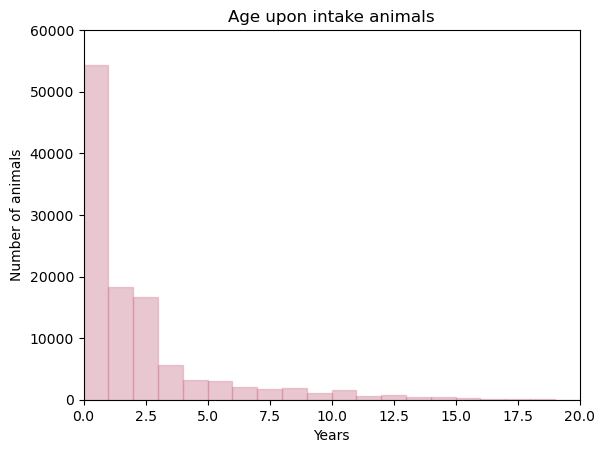

In [33]:
univariate_age(df_in, "Age upon Intake")

#### Univariační popisné statistiky - DateTime


In [21]:
def univariate_DateTime(df):
    df_time = df
    df_time["Date"] = df_time["DateTime"].dt.date
    df_time.sort_values(by=["DateTime"], inplace=True)
    stats = pd.DataFrame({"DateTime" : [df_time["DateTime"].iloc[0],
                                        df_time["DateTime"].iloc[-1],
                                        df_time["DateTime"].value_counts().idxmax(),
                                        df_time["DateTime"].mean()],
                        "Animal Type" : [df_time["Animal Type"].iloc[0],
                                         df_time["Animal Type"].iloc[-1],
                                         np.nan,
                                         np.nan]},
                         index=["first animal", "last animal", "most frequente value", "mean"])
    df_time_date_by_day = df_time["Date"]
    display(stats)
    df_for_plot = pd.DataFrame({"Amount": df_time["Date"].value_counts()})
    df_for_plot.sort_index(inplace=True)
    
    fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    sns.lineplot(data=df_for_plot["Amount"], linewidth = 0.3, color="#0d00c9", ax=ax1, legend=True)
    sns.histplot(data=df_time_date_by_day, binwidth=0.1, ax=ax2)


,DateTime,Animal Type
first animal,2013-10-01 07:51:00.000000000,Dog
last animal,2022-04-27 07:54:00.000000000,Cat
most frequente value,2014-07-09 12:58:00.000000000,NaN
mean,2017-09-02 05:55:42.786230528,NaN


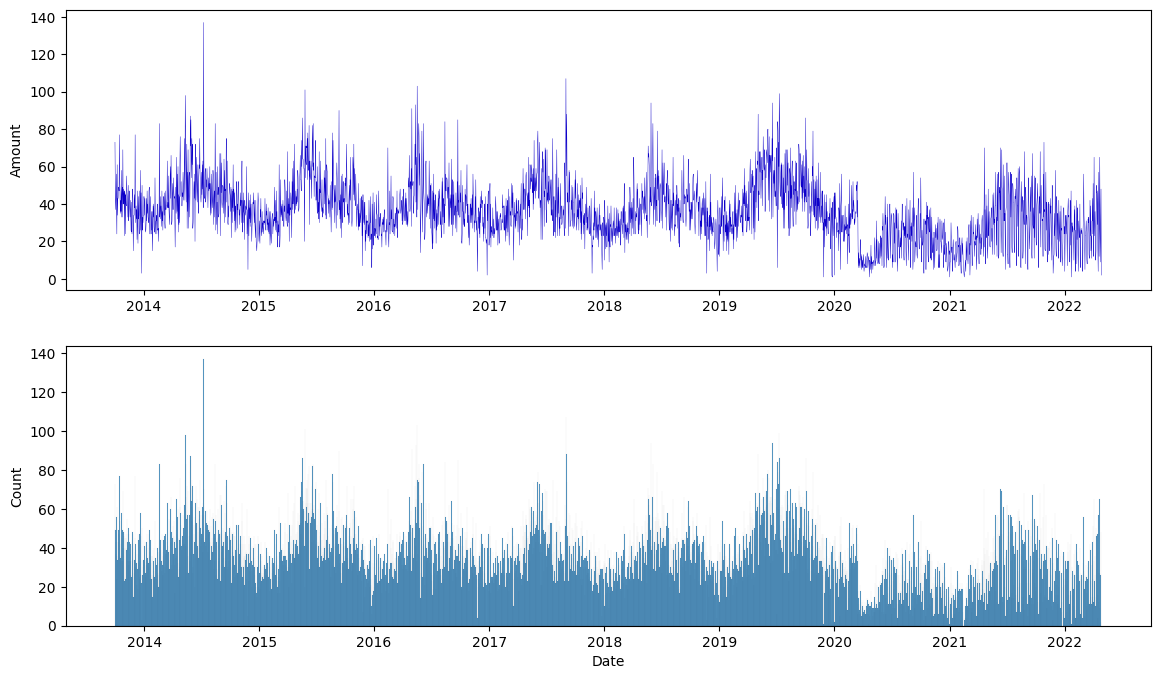

In [22]:
univariate_DateTime(df_in)

Z grafu je vidět, že každý rok mezo 2014-2020 byl příjem zvířat velmi podobně periodický. V zimě, tedy napřelomu meti roky bylo příchozích zvířat méně, během léta, tedy v polovině roku právě naopak. V grafu je vidět že v první třetině roku 2020 nastal rapidní úbytek přijímaných zvířat. V té době svět zasáhla pandemie, lidé nevycházeli z domů a tak lze usoudit, že buď neměli ani možnost opuštěná zvířata objevit, nebo útulek omezil svoji činnost z důvodu vládních nařízení nebo ze strachu z nákazy. Zajímavé je, příjem zvířat se následně navýšil, ale doposud se stále nedostal na čísla, která byla před pandemií. 

#### Univariační popisné statistiky - Intake condition

První vlastní univariační statistiku věnují stavu přijímaných zvířat. Ve dvou grafech je vidět jaký je poměr zvířat v normálním stavu a v "nenormálním". Pro znázornění všech uvedených kategorií jsem zvolila histogram, pro znázornění "normální vs. nenormální" jsem zvolila koláčový graf. Vzhledem k tomu, že v tomto sloupci je několik příznaků s malým zastoupením, tyto dva grafy mi přišli ideální s právě tyto daty.

In [23]:
colors = ["#6d68b0","#9a65b3","#c560ab","#e95d98","#ff617e","#ff715e","#ff893b","#ffa600"]
colors2 = ["#6d68b0","#9a65b3"]
def univariate_category(df, col):
    stats = pd.DataFrame({'Frequency': df[col].value_counts()})
    
    display(stats)
    
    sum_not_normal = stats['Frequency'].iloc[1:].sum()
    normal_vs_not = pd.DataFrame({'Frequency': [stats['Frequency'].iloc[0], sum_not_normal]}, index = ["Normal", "Not normal"])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
    nums = ax1.bar(stats.index, stats['Frequency'], width = 0.6, color=colors)
    ax1.bar_label(nums, padding=2)
    ax1.grid(visible=False)
    plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
    ax2.pie([stats['Frequency'].iloc[0], sum_not_normal],
            labels=["Normal", "Not normal"],
            colors=colors2,
            autopct='%1.1f%%',
            startangle=90)      

,Frequency
Normal,94815
Injured,7076
Sick,5610
Nursing,3822
Aged,399
Neonatal,316
Other,217
Medical,150
Feral,116
Pregnant,93


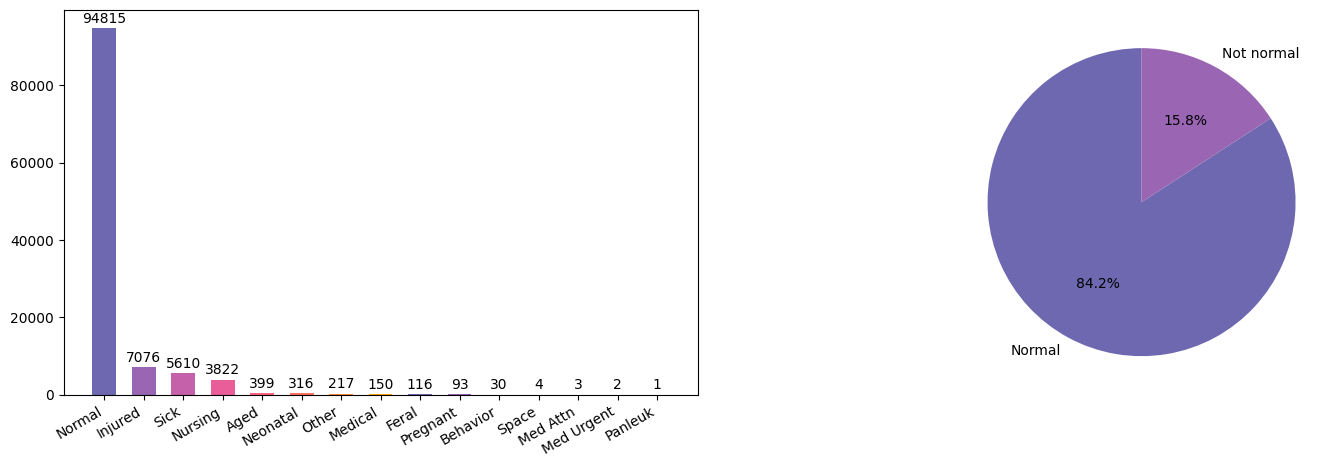

In [24]:
univariate_category(df_in, "Intake Condition")

#### Univariační popisné statistiky - Animal type

V tomto sloupci je pouze pět různých příznaků. Zvolila jsem tedy stejné grafy jako v předchozí statistice, akorát s úplně stejnými daty, vzhledek k nízkému počtu příznaků.`

In [25]:
colors = ["#fce72b","#ffc42c","#ffa23e","#ff8253","#ff6666"]
def univariate_category(df, col):
    stats = pd.DataFrame({'Amount': df[col].value_counts()})
    
    display(stats)
    
    sum_not_normal = stats['Amount'].iloc[1:].sum()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    tmp = ax1.bar(stats.index, stats['Amount'], width = 0.4, color=colors)
    ax1.bar_label(tmp, padding=2)
    ax1.set_title("Amount of intake animals")
    plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
    
    explode = (0, 0,0.2,0.4,0.5)
    ax2.pie(stats["Amount"], labels=None, colors=colors, autopct='%1.1f%%', explode=explode, startangle=90)
    ax2.legend(stats.index, title="Animal types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax2.set_title("Amount of\nintake animals", loc='left')

,Amount
Dog,56871
Cat,47782
Other,7316
Bird,661
Livestock,24


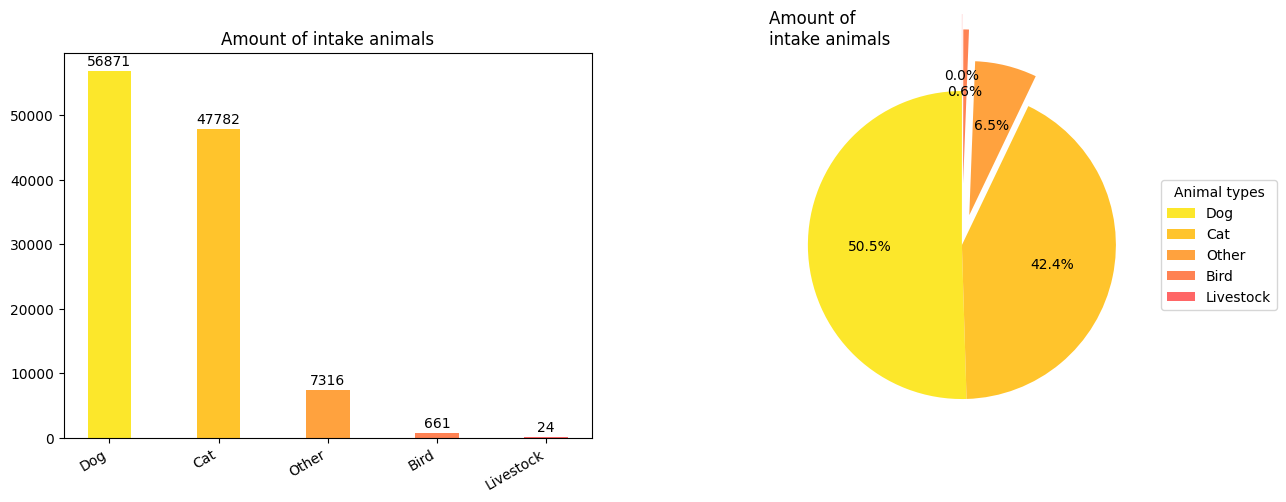

In [26]:
univariate_category(df_in, "Animal Type")

#### Univariační popisné statistiky - Sex upon Intake¶

Poslední univariační statistika je věnována pohlaví příjatých zvířat. Využila jsem barevné škály, která vyjadřuje červeně ženské pohlaví, modře mužské, tmavě nesterilizované, světle sterilizované, šedě neznámé. Opět jsem vytiskla jak koláčový tak sloupcový graf jen pro zajímavost. Oba grafy jsou nad stejnými daty.

In [27]:
colors = ["#0099ff","#e01941","#9bbbf0","#dfdfdf","#ec8d8c"]

def univariate_category(df, col):
    stats = pd.DataFrame({'Amount': df[col].value_counts()})
    
    display(stats)
    
    sum_not_normal = stats['Amount'].iloc[1:].sum()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    nums = ax1.bar(stats.index, stats['Amount'], width = 0.4, color=colors)
    ax1.bar_label(nums, padding=2)
    ax1.set_title("Amount of intake animals by sex")
    plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
    
    ax2.pie(stats["Amount"], labels=None, colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.legend(stats.index, title="Animal types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax2.set_title("Amount of intake animals by sex", loc='left')

,Amount
Intact Male,40096
Intact Female,39172
Neutered Male,11826
Unknown,11042
Spayed Female,10518


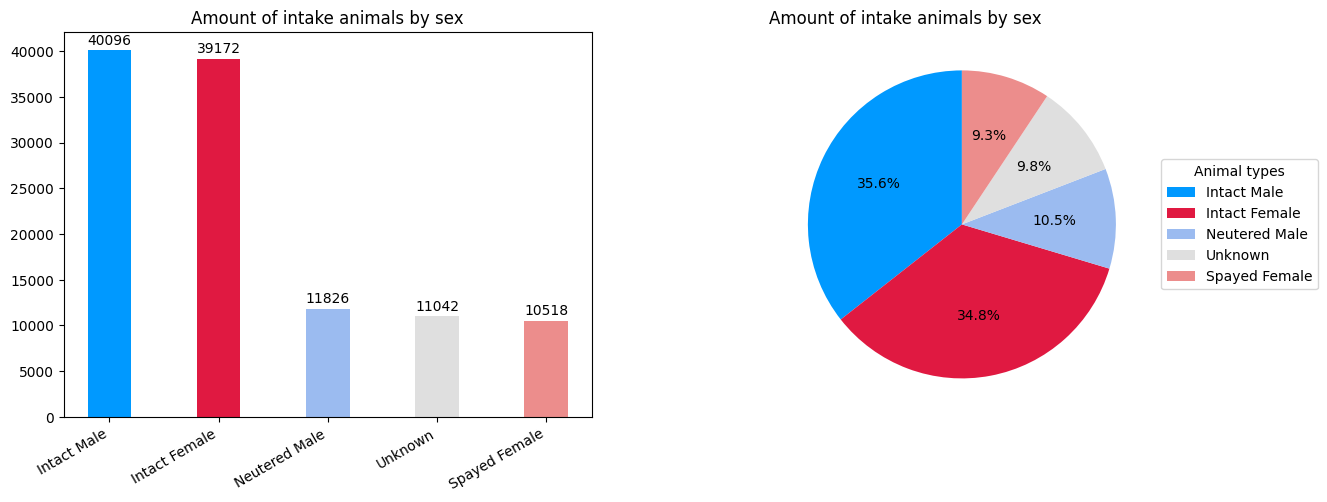

In [28]:
univariate_category(df_in, "Sex upon Intake")

#### Bivariační popisná statistika

Pro bivariační statistiku jsem se rozhodla porovnat "nenormální" stav přijímaných koček a psů. Ostatní zvířata a kočky a psi v normálním stavu z grafu vynechám, protože jich je velmi nízký, respektive vysoký počet oproti zkoumané množině, a tak by rozdíly, které chci aby v grafu byly vidět, nakonec vidět nebyly.

In [29]:
def bivariate_cmp(df, col1, col2):
    df_cats = df.loc[df[col1] == "Cat"]
    df_cats = df_cats.loc[df_cats[col2] != "Normal"]
    df_cats = pd.DataFrame({'Amount': df_cats[col2].value_counts()})
    df_cats = df_cats.drop(index="Normal")
    df_dogs = df.loc[df[col1] == "Dog"]
    df_dogs = df_dogs.loc[df_dogs[col2] != "Normal"]
    df_dogs = pd.DataFrame({'Amount': df_dogs[col2].value_counts()})
    df_dogs = df_dogs.drop(index="Normal")
    df_all = pd.merge(df_cats, df_dogs, left_index=True, right_index=True, suffixes=["_cats", "_dogs"])
    display(df_all)

    lenght = np.arange(len(df_cats['Amount']))
    width = 0.4
    
    fig, ax = plt.subplots(figsize=(17,6))
    
    cats = ax.bar(lenght - width/2, df_all['Amount_cats'], width, label='Cats', color="#ff8b87" )
    dogs = ax.bar(lenght + width/2, df_all['Amount_dogs'], width, label='Dogs', color="#ffb36e")
    
    
    ax.bar_label(cats, padding=2)
    ax.bar_label(dogs, padding=2)
    ax.set_xticks(lenght)
    ax.set_xticklabels(df_cats.index)
    ax.legend()
    ax.set_title("Amount of intaken cats and dogs upon conditon")
    
    fig.tight_layout()
    plt.show()

,Amount_cats,Amount_dogs
Injured,2966,2981
Nursing,2535,1178
Sick,2245,1764
Neonatal,222,82
Feral,106,9
Other,91,113
Aged,57,339
Medical,40,107
Pregnant,29,64
Space,4,0


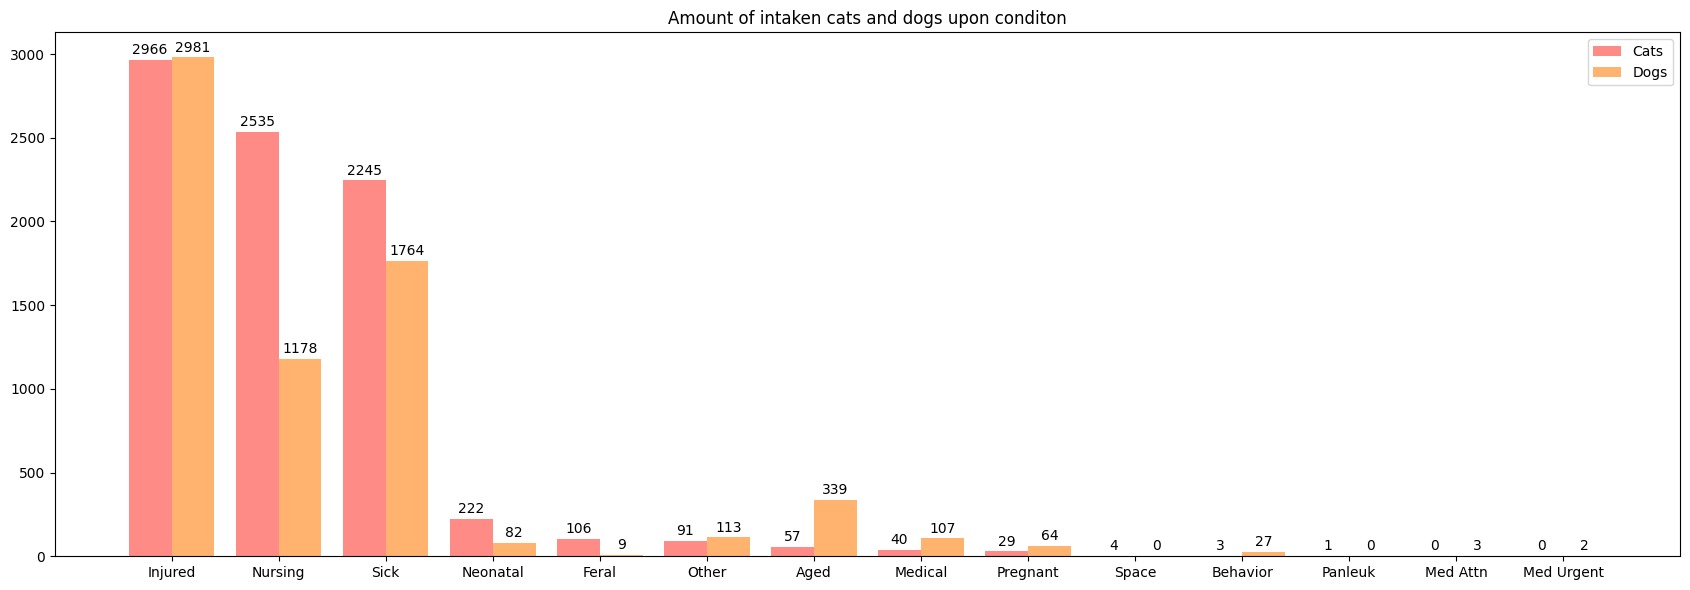

In [30]:
bivariate_cmp(df_in, "Animal Type", "Intake Condition")

## Zadané otázky

### Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

Pro zodpovězení otázky jsem se rozhodla vykreslit dvě `heatmapy`. Obě budou nad stejnými daty, akorát jedna bude mít data normalizované, což mi umožní zjistit procentální zastoupení jednotlivých kategorických příznaků. Druhá bude obyčejně obsahovat počet zvířat splňující příslušný typ příchodu respektive odchodu.

<AxesSubplot: xlabel='Intake Type', ylabel='Outcome Type'>

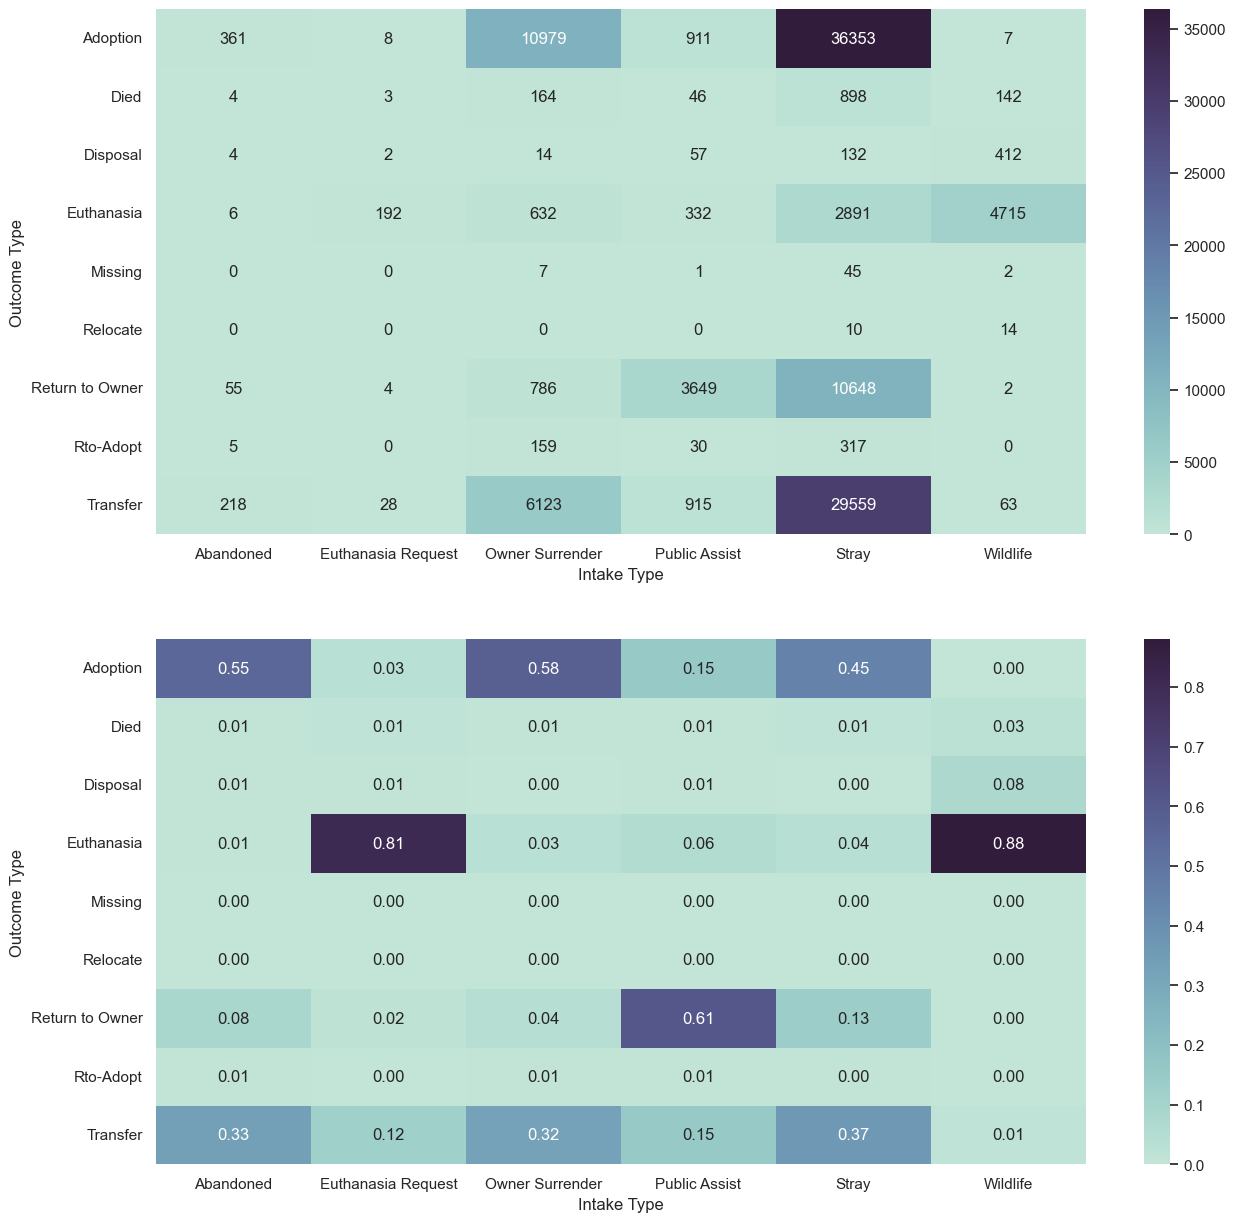

In [50]:
# prepare a new dataframe with 3 columns only
df_left = df_in[["Animal ID", "Intake Type"]].copy()
df_rigt = df_out[["Animal ID", "Outcome Type"]].copy()

# merge these two dataframes into one
df_type = pd.merge(df_left, df_rigt, on="Animal ID")

# grouped by and make a tab
df_grouped = pd.DataFrame({'Amount' : df_type.groupby(["Intake Type"])["Outcome Type"].value_counts()}).reset_index()
df_grouped = df_grouped.reset_index().pivot(index='Outcome Type', columns='Intake Type', values='Amount')

# grouped by, make dataframe and normalized
df_grouped_norm = pd.DataFrame({'Amount' : df_type.groupby(["Intake Type"])["Outcome Type"].value_counts(normalize=True)}).reset_index()
df_grouped_norm = df_grouped_norm.reset_index().pivot(index='Outcome Type', columns='Intake Type', values='Amount')

#plot the heatmap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
sns.heatmap(df_grouped, annot=True, fmt=".0f", cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax1)
sns.heatmap(df_grouped_norm, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax2)

Z grafu je vidět, že nejvíce přijatých zvířat jsou zvířata, které "zabloudila" (příznak *Stray*). Taková zvířata jsou přirozeně významě zastoupena v adopci i převozu, ve 13% jsou navrácena svému majiteli.

Zajímavý je příznak asistované smrti. Jen část zvířat, která jsou "odsouzena" na asistovanou smrt, ji nakonec podstoupila. Několik zvířat bylo převezeno, nebo dokoce adoptováno jiným majitelem.

Znepokojující může být číslo divokých zvířat, která byla asistovaně usmrcena po přívozu do útulku. Z druhé tabulky můžeme vidět, že takto dopadalo zhruba 90% divokých zvířat, což je více než zvířat, která měla eutanásii podstoupit.

Nepřekvapivou informací může být například to, že zvířata odchycena za pomoci veřejnosti se vrací ve více než 60% ke svým původním majitelům. 

Pozitivní je, že 55% opuštěných zvířat je adoptováno novým majitelem.

### Hraje věk zvířete roli při adopci?

In [32]:
def adoption_per_age(df_out):
    df1 = df_out.loc[df_out["Outcome Type"] == "Adoption"]
    df2 = df_out.loc[df_out["Outcome Type"] != "Adoption"]
    df1 = df1[["Outcome Type", "Age upon Outcome"]]
    df2 = df2[["Outcome Type", "Age upon Outcome"]]
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.histplot(data=df1, x="Age upon Outcome", kde=True, bins=20, element="step", color="#231b6d", label="Adopted")
    sns.histplot(data=df2, x="Age upon Outcome", kde=True, bins=20, element="step", color="#8876b4", label="Not adopted")
    sns.histplot(data=df_out, x="Age upon Outcome", kde=True, bins=20, element="step", color="#e9ddff", label="All")
    ax.set_xticks(range(len(np.arange(31))))
    ax.set_xticklabels(np.arange(31))  
    ax.grid(visible=False)



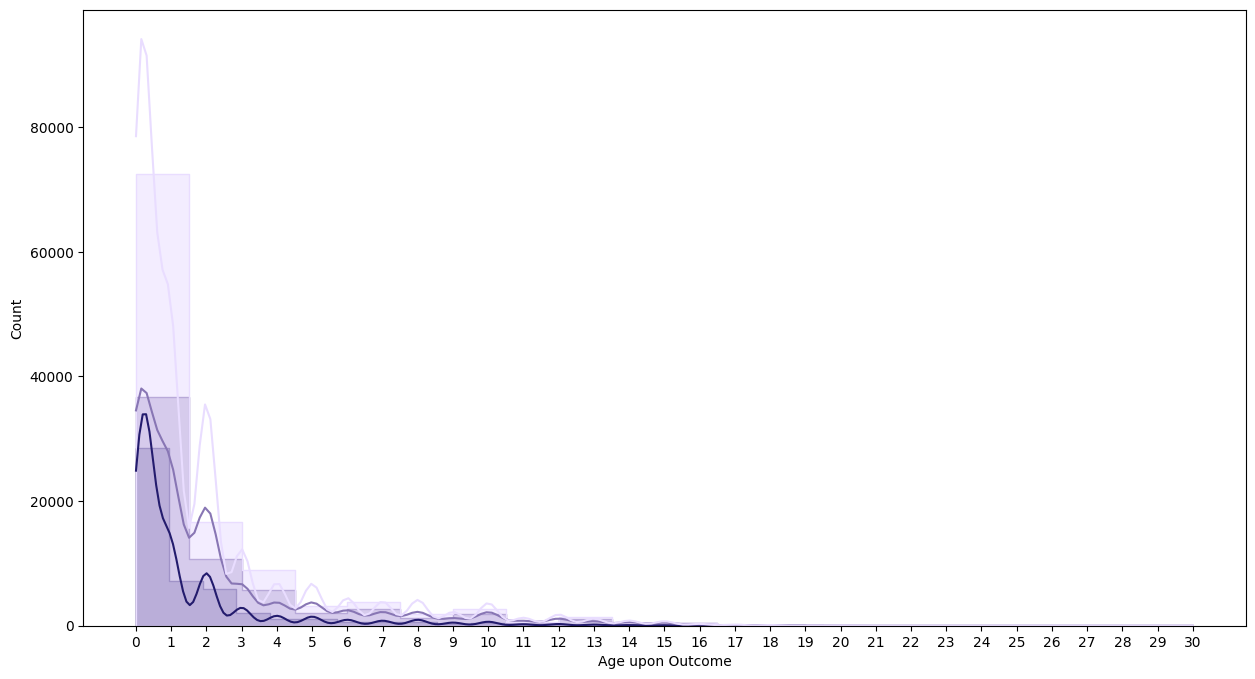

In [33]:
adoption_per_age(df_out)

Z grafu je vidět, že věk na adoptované, či neadoptované mazlíčky nemá moc vliv. Pouze na začátku grafu je vidět, že počet adoptovaných a neadoptovaných zvířat je velmi podobný, avšak dále v grafu, tedy u starších zvířat, adopce nedominuje.

### Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

In [34]:
def colors_from_values(amount, pal):
    """Abdo B., (2020, March 29).
    Changing color scale in Seaborn Bar Plot.
    Stack Overflow. Retrieved November 10, 2022,
    from https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
    """
    normalized = (amount - min(amount)) / (max(amount) - min(amount))
    indices = np.round(normalized * (len(amount) - 1)).astype(np.int32)
    palette = sns.color_palette(pal, len(amount))
    return np.array(palette).take(indices, axis=0)

def intake_per_year(df):
    monthYear = pd.DataFrame(pd.DatetimeIndex(df_in["MonthYear"],).month)
    stats = pd.DataFrame({'Amount': monthYear["MonthYear"].value_counts().sort_index()})
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
    
    fig, ax = plt.subplots(figsize=(11,4))
    sns.set(style="whitegrid", color_codes=True)
    sns.color_palette("Spectral", as_cmap=True)
    sns.countplot(x=monthYear["MonthYear"], palette=colors_from_values(stats["Amount"],"ch:s=-.2,r=.6"))
    ax.set(xlabel = 'Month', ylabel = 'Amount')   
    ax.set_xticklabels(months)

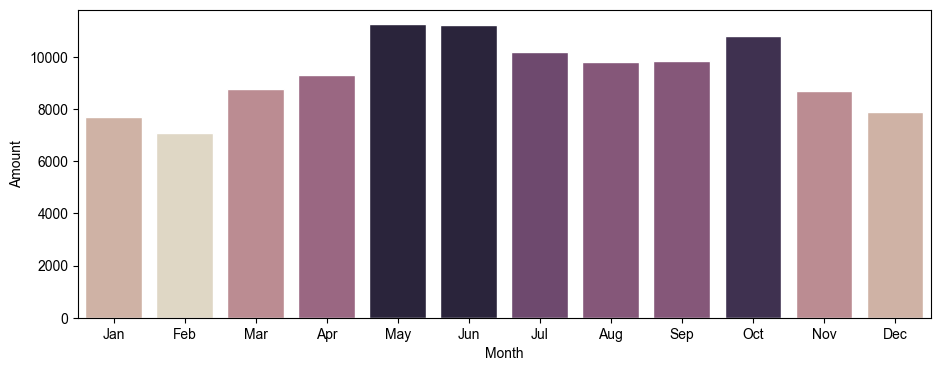

In [35]:
intake_per_year(df_in)

Z grafu je vidět, že v letním období opravdu zvířat v útulku přibývá více. Tento jev už byl vidět i v univariačním výpisu pro sloupec DateTime. V zimě je sposta divokých zvířat zalezlá, v zimním spánku nebo obecně méně aktivní, a tak teto jev není překvapivý. Zajímavý je nárůst v řijnu. Lze ho přisuzovat nepříklad vyšímu výskytu zesláblých divokých zvířat (např. ježků), které lidi donesou na záchranou stanici s obavami o jejichpřežití v zimě.

## Vlastní otázky

### Jakou dobu stráví zvíře v útulku? 

Uvažuji opět zvířata, která se v útulku objevila právě jednou, tedy nemělo by dojít ke zkreslení informace.

In [36]:
def time_spent(df_in, df_out):
    left = pd.DataFrame().assign(ID=df_in['Animal ID'], DateTime=df_in['DateTime'])
    right = pd.DataFrame().assign(ID=df_out['Animal ID'], DateTime=df_out['DateTime'])
    df_merged = pd.merge(left, right, on="ID")
    df_merged["Substract"] = (df_merged["DateTime_y"] - df_merged["DateTime_x"]).dt.days
    df_merged["Substract"] = df_merged["Substract"].replace([-1], 0)
    print(df_merged["Substract"].agg(['min', 'max', 'mean']))
    print(df_merged.query("Substract == 1912")["ID"])
    #display(df_merged)
    #df_merged.info()
    plt.figure(figsize=(15,6))
    sns.histplot(data=df_merged, x=df_merged.query("Substract < 200")['Substract'], bins=200)


min        0.000000
max     1912.000000
mean      18.044627
Name: Substract, dtype: float64
34634    A642712
Name: ID, dtype: object


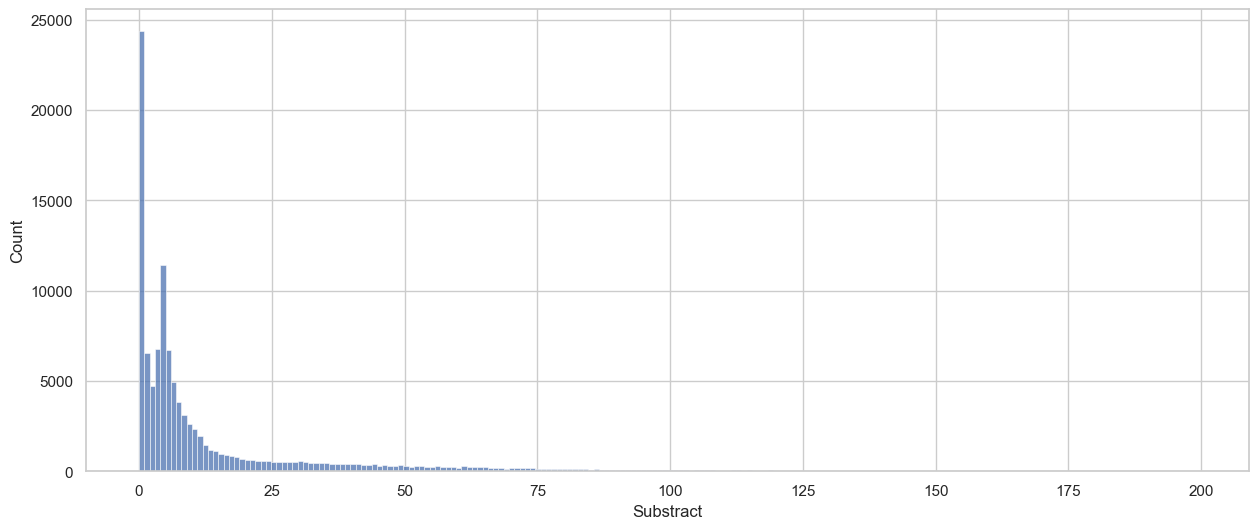

In [37]:
time_spent(df_in, df_out)

Z následujícího grafu a výpisu můžeme vidět, že zvířata se v útulku dlouho nezdržují. Naopak ze statistiky vypsané pomocí agregační funkce je vidět, že maximiální doba stávená v útulku je 1912 dní, což je více než 5 let. Z kontorlního výpisu je vidět, že zvíře opravdu bylo v útulku tak dlouho. Avšak pozitivní zpráva je, že průměr je méně než 19 dní. 

### Jaký je poměr přijatých čistokrevných a míšených ras zvířat v útulku?

In [38]:
def replace_mix_pure(x):
    if "Mix" in x:
        return "Mix"
    else:
        return "Purebred"

In [39]:
df_mixed = pd.DataFrame()
df_mixed = df_in
df_mixed["Breed"] = df_mixed["Breed"].astype('object')
df_mixed["Breed"] = df_mixed["Breed"].apply(replace_mix_pure)

<AxesSubplot: xlabel='Animal Type', ylabel='count'>

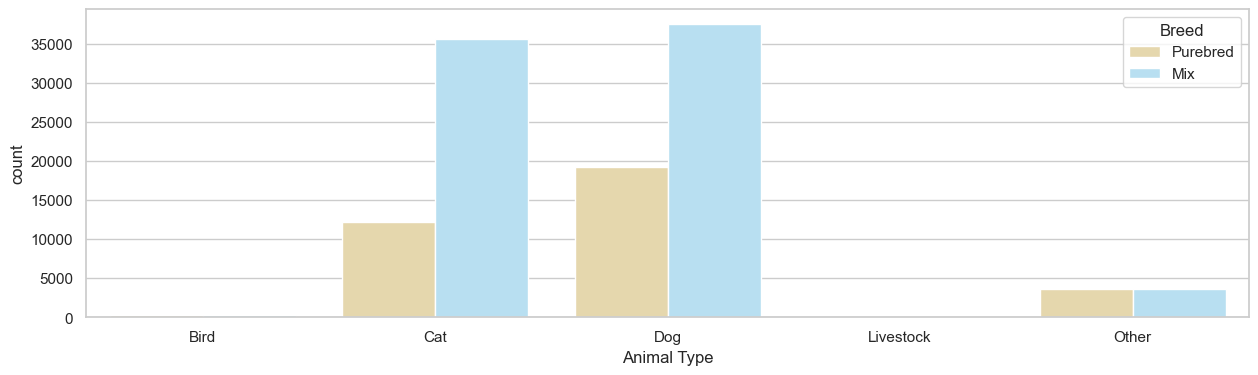

In [40]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data=df_mixed, x="Animal Type", hue="Breed", palette=["#eedca4", "#aee3fb"])

Z grafu je vidět, že psi i kočky přicházející do útulku jsou minimálně ze dvou třetin nečistokrevná plemena. Ostatní zvířata jsou až překvapivěvyvážena. Osobně vnímám překvapé, jak velký je počet šlechtěných psů přicházející do útulku. Osobně bych čekala toto číslo nižší.

### Kde všude byly nejvíce nalezeny zvířata z dat location.csv?

Na poslední otázku jsem chtěla využít data location.cvs. Všimla jsem si, že u některých nálezů jsou uvedené přesné souřadnice, a tak jsem se rozhodla je vytáhnout ze sloupce a postupně zanést na mapu. 

In [41]:
df_loc = pd.read_csv("locations.csv")

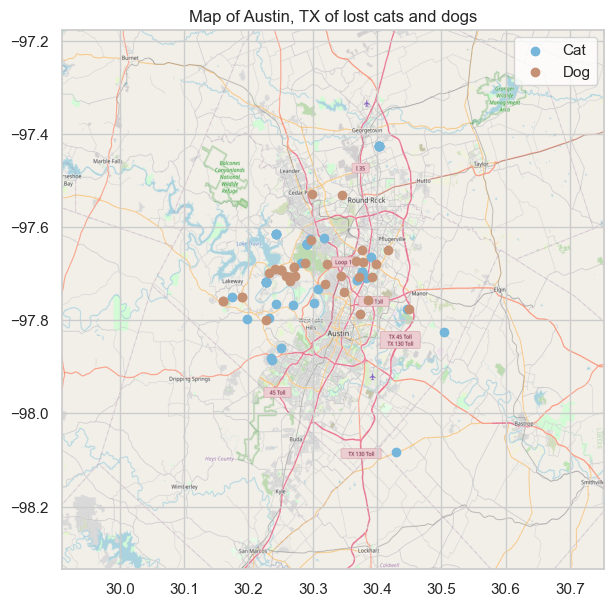

In [42]:
df_loc["coords_x"] = df_loc["Found Location"].str.extract(r'(30.[0-9]+)')
df_loc["coords_y"] = df_loc["Found Location"].str.extract(r'(-9[7-8].[0-9]+)')
df_loc["coords_x"] = df_loc["coords_x"].astype("float64")
df_loc["coords_y"] = df_loc["coords_y"].astype("float64")
#print(df_loc["coords_x"].agg(['min', 'max']))
#print(df_loc["coords_y"].agg(['min', 'max']))

min_max_co = ((df_loc.coords_x.min()-0.25, df_loc.coords_x.max()+0.25,      
         df_loc.coords_y.min()-0.25, df_loc.coords_y.max()+0.25))

map_img = plt.imread('map-2.png')

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_loc.loc[df_loc["Type"] == "Cat"].coords_x, df_loc.loc[df_loc["Type"] == "Cat"].coords_y, c="#75b6da", label="Cat")
ax.scatter(df_loc.loc[df_loc["Type"] == "Dog"].coords_x, df_loc.loc[df_loc["Type"] == "Dog"].coords_y, c="#c59175", label="Dog")
ax.set_title('Map of Austin, TX of lost cats and dogs')
ax.set_xlim(min_max_co[0],min_max_co[1])
ax.set_ylim(min_max_co[2],min_max_co[3])
ax.imshow(map_img, extent = min_max_co, aspect="auto")
ax.legend()

Z mapy je dokonce vidět, že kočky jsou odchytávány i mimo centrum města, zatímco toulavý, nebo zdtracení psi se vyskytují především v centru Austinu.